# Importing Required Libraries

The code cell imports the necessary libraries for data visualization and manipulation tasks. These libraries enable the notebook to perform tasks such as loading data from pickle files, creating plots, and counting occurrences of items in lists.

In [30]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data from a Pickle File

The code cell loads data from a pickle file named 'results.pickle' using the `pickle.load()` function. The file is opened in binary read mode (`rb`), and the data is stored in the variable `youtube_data`.

In [31]:
with open("results.pickle", 'rb') as file:
            youtube_data = pickle.load(file)

In [ ]:
youtube_data

# Top 20 Tags Used

The code cell calculates the frequency of each tag in the `youtube_data` dictionary, which contains tags associated with YouTube videos. It utilizes the `Counter` class to count the occurrences of each tag across all videos. The resulting `tag_freq` dictionary maps each tag to its frequency.

### Analyzing Tag Usage Frequency

This visualization displays the frequency of the top 20 most commonly used tags across all YouTube videos in the dataset. The x-axis represents the tags, while the y-axis represents their corresponding frequencies. Tags are sorted in descending order of frequency for easier interpretation.


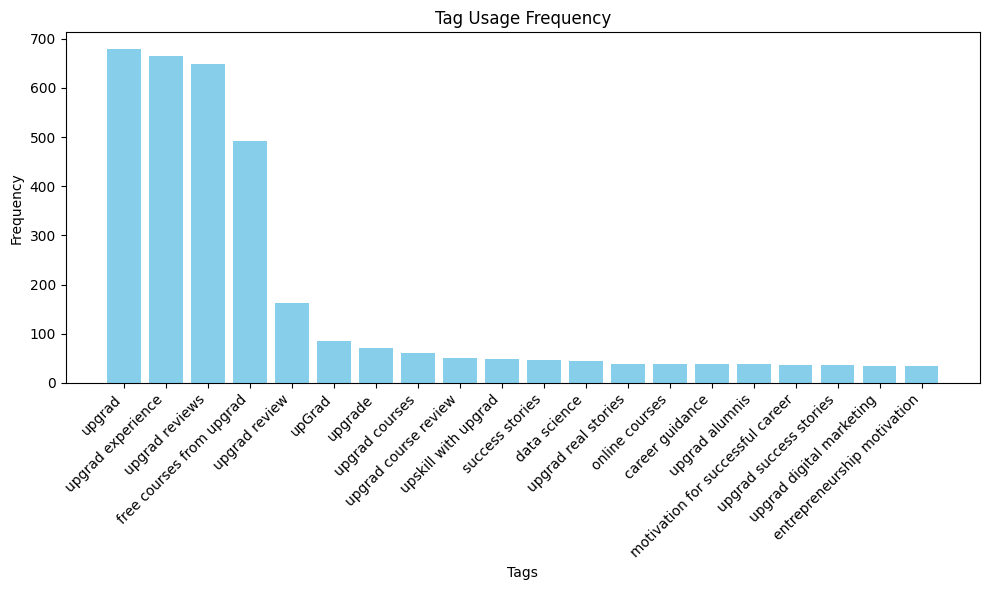

In [33]:
tag_freq = Counter(tag for tags in youtube_data.values() for tag in tags)

# Sort tags based on their frequencies
sorted_tags = sorted(tag_freq.items(), key=lambda x: x[1], reverse=True)

# Extract tag names and frequencies
tags, frequencies = zip(*sorted_tags[0:20])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(tags, frequencies, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Tag Usage Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 20 Tags in the Top 5 Tags

The code cell calculates the frequency of the first 5 tags for each video in the `youtube_data` dictionary. It utilizes list slicing to consider only the first 5 tags of each video before counting their occurrences. The resulting `tag_freq` dictionary maps each tag to its frequency.

### Analyzing Tag Usage Frequency (Limited to First 5 Tags per Video)

This visualization displays the frequency of the top 20 most commonly used tags across all YouTube videos in the dataset, considering only the first 5 tags per video. The x-axis represents the tags, while the y-axis represents their corresponding frequencies. Tags are sorted in descending order of frequency for easier interpretation.

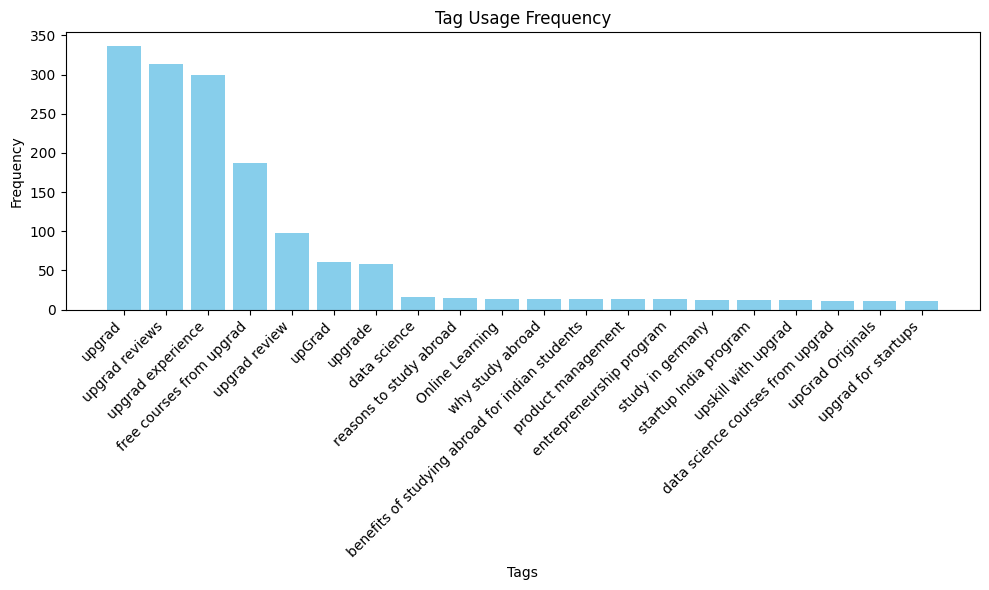

In [34]:
tag_freq = Counter(tag for tags in youtube_data.values() for tag in tags[0:5])

# Sort tags based on their frequencies
sorted_tags = sorted(tag_freq.items(), key=lambda x: x[1], reverse=True)

# Extract tag names and frequencies
tags, frequencies = zip(*sorted_tags[0:20])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(tags, frequencies, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Tag Usage Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tags vs First Five Tags Plot : Strict

The code cell calculates statistics for specific tags and identifies strict video SEO requirements based on these statistics. It then visualizes the statistics for the specified tags and lists the videos that require strict SEO based on the provided criteria.

### Analyzing Tag Statistics and Strict Video SEO Requirements

This code snippet calculates statistics such as the number of videos containing each tag and the frequency of each tag in the first five videos. It then visualizes these statistics using a bar plot and lists the videos that require strict SEO based on the provided criteria.

[(44, 16), (22, 13), (25, 10), (10, 1)]


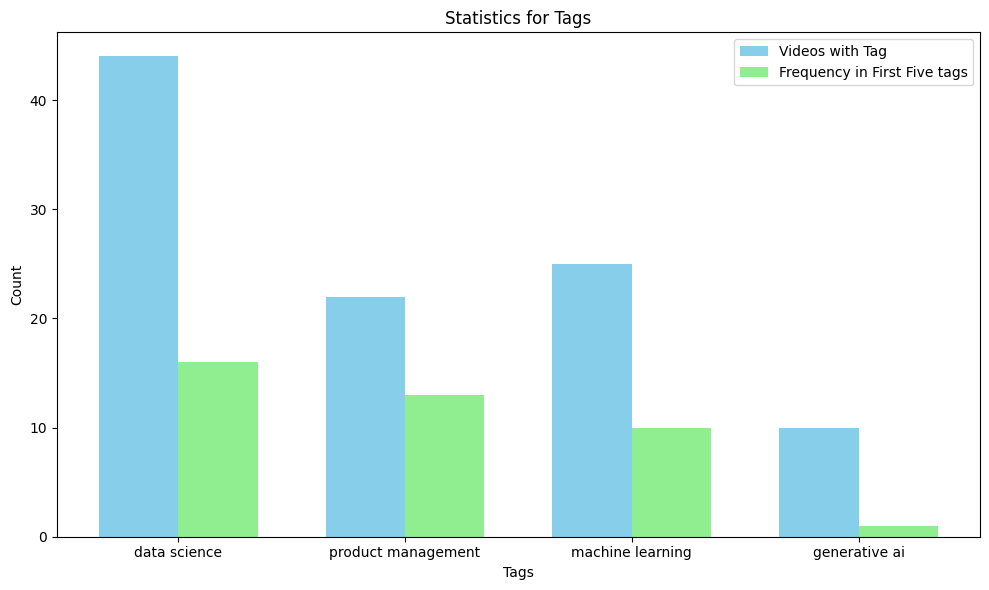

['https://www.youtube.com/watch?v=0j78_6JtARU', 'https://www.youtube.com/watch?v=3PYacpnImCY', 'https://www.youtube.com/watch?v=vP-VvrK9j4k', 'https://www.youtube.com/watch?v=Hcm0pDmC4bI', 'https://www.youtube.com/watch?v=T8CYrTk8IGE', 'https://www.youtube.com/watch?v=gwGw91GwAsI', 'https://www.youtube.com/watch?v=OZ1syqu7TXw', 'https://www.youtube.com/watch?v=STna2vrspHw', 'https://www.youtube.com/watch?v=mxgx9oStxsU', 'https://www.youtube.com/watch?v=CLtXHE8XPtI', 'https://www.youtube.com/watch?v=DY8Kdkos9rw', 'https://www.youtube.com/watch?v=oGz0J_pb5Tk', 'https://www.youtube.com/watch?v=GfLCBwaB44E', 'https://www.youtube.com/watch?v=NjPLkkSNzK8', 'https://www.youtube.com/watch?v=Dqg9TmkoX9I', 'https://www.youtube.com/watch?v=YINW87CditE', 'https://www.youtube.com/watch?v=Wjdjnvp2dho', 'https://www.youtube.com/watch?v=fybn1bfs9y0', 'https://www.youtube.com/watch?v=GYBFAvSVLzQ', 'https://www.youtube.com/watch?v=de7ZUb1fH3s', 'https://www.youtube.com/watch?v=yMVRnqj2LZc', 'https://www

In [35]:
strict_vid_seo_req =[]
def count_tag_occurrences(tag):
    num_videos_with_tag = 0
    freq_in_first_five = 0
    
    # Count the number of videos that contain the given tag
    for tags in youtube_data.values():
        if tag in tags:
            num_videos_with_tag += 1

    # Count the frequency of the tag in the first five videos
    for item in youtube_data:
        tags = list(youtube_data[item])
        if(tag in tags[0:5]):
            freq_in_first_five += tags.count(tag)
        elif(tag in tags and tag not in tags[0:5]):
            strict_vid_seo_req.append(item)



    return num_videos_with_tag, freq_in_first_five

# List of tags to analyze
tags_to_analyze = ["data science", "product management", "machine learning","generative ai"]

# Calculate statistics for each tag
stats = [count_tag_occurrences(tag) for tag in tags_to_analyze]
print(stats)
# Extract statistics for plotting
num_videos_with_tag = [stat[0] for stat in stats]
freq_in_first_five = [stat[1] for stat in stats]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(tags_to_analyze))

plt.bar(index, num_videos_with_tag, bar_width, label='Videos with Tag', color='skyblue')
plt.bar([i + bar_width for i in index], freq_in_first_five, bar_width, label='Frequency in First Five tags', color='lightgreen')

plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Statistics for Tags')
plt.xticks([i + bar_width / 2 for i in index], tags_to_analyze)
plt.legend()
plt.tight_layout()
plt.show()

print(strict_vid_seo_req)

# Trends and Search Volumes

https://trends.google.com/trends/explore?cat=958&date=2022-03-08%202024-04-08&geo=IN&gprop=youtube&q=Management

https://trends.google.com/trends/explore?cat=958&date=2022-03-08%202024-04-08&geo=IN&gprop=youtube&q=Software


# Analyzing the Distribution of Views (Simplilearn)

The code cell reads a CSV file named `Simplilearn-Duration-Views.csv` into a DataFrame `df`, converts the `Views` column to numeric format, and coerces errors to NaN values. NaN values are then dropped from the DataFrame. 

Next, the code defines bins for views and creates a new column `View Category` based on these bins. It then counts the number of data points in each category and plots the distribution of views.

This visualization displays the distribution of views into different categories based on the number of views each video has received.

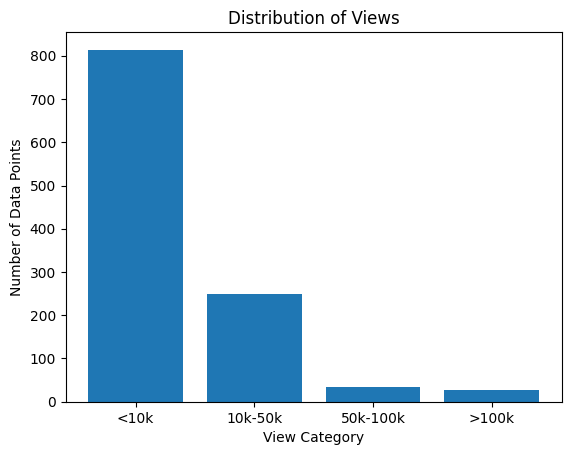

In [36]:
# Read the CSV file
df = pd.read_csv('Simplilearn-Duration-Views.csv')

# Convert 'Views' column to numeric, coerce errors to NaN
df['Views'] = df['Views'].str.replace(',', '').astype(float)
df['Views'] = pd.to_numeric(df['Views'], errors='coerce')

# Drop NaN values
df.dropna(subset=['Views'], inplace=True)

# Define the bins for views
bins = [0, 10000, 50000, 100000, float('inf')]
labels = ['<10k', '10k-50k', '50k-100k', '>100k']

# Create a new column 'View Category' based on the bins
df['View Category'] = pd.cut(df['Views'], bins=bins, labels=labels, right=False)

# Count the number of data points in each category
view_counts = df['View Category'].value_counts().sort_index()

# Plotting
plt.bar(view_counts.index, view_counts.values)
plt.title('Distribution of Views')
plt.xlabel('View Category')
plt.ylabel('Number of Data Points')
plt.show()


# Analyzing the Distribution of Views (upGrad)

The code cell reads a CSV file named `upGrad-Duration-Views.csv` into a DataFrame `df`, converts the `Views` column to numeric format, and coerces errors to NaN values. NaN values are then dropped from the DataFrame. 

Next, the code defines bins for views and creates a new column `View Category` based on these bins. It then counts the number of data points in each category and plots the distribution of views.

This visualization displays the distribution of views into different categories based on the number of views each video on upGrad's YouTube channel has received.

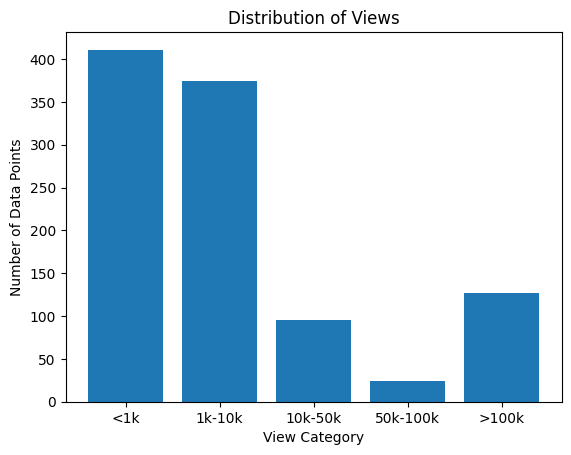

In [37]:
# Read the CSV file
df = pd.read_csv('upGrad-Duration-Views.csv')

# Convert 'Views' column to numeric, coerce errors to NaN
df['Views'] = df['Views'].str.replace(',', '').astype(float)
df['Views'] = pd.to_numeric(df['Views'], errors='coerce')

# Drop NaN values
df.dropna(subset=['Views'], inplace=True)

# Define the bins for views
bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1k', '1k-10k', '10k-50k', '50k-100k', '>100k']

# Create a new column 'View Category' based on the bins
df['View Category'] = pd.cut(df['Views'], bins=bins, labels=labels, right=False)

# Count the number of data points in each category
view_counts = df['View Category'].value_counts().sort_index()

# Plotting
plt.bar(view_counts.index, view_counts.values)
plt.title('Distribution of Views')
plt.xlabel('View Category')
plt.ylabel('Number of Data Points')
plt.show()


# Comparing Distribution of Video Durations

The code cell reads data from CSV files containing duration and views information for both upGrad and Simplilearn YouTube channels. It then converts the duration from mm:ss format to minutes and plots histograms to compare the distribution of video durations between the two channels.

This visualization compares the distribution of video durations between upGrad and Simplilearn YouTube channels. The x-axis represents the duration of the videos in minutes, and the y-axis represents the frequency of videos falling into each duration bin.

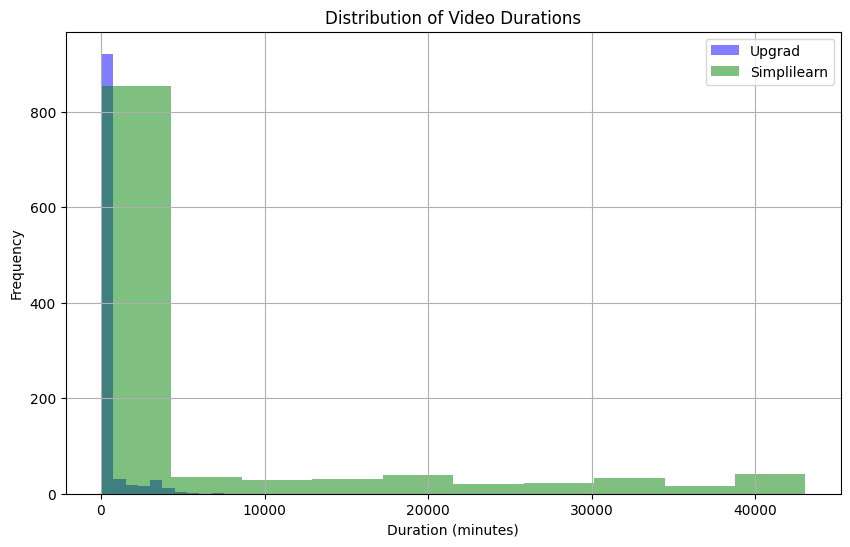

In [38]:
upgrad_data = pd.read_csv('upGrad-Duration-Views.csv')
simplilearn_data = pd.read_csv('Simplilearn-Duration-Views.csv')

# Function to convert mm:ss format to minutes
def convert_to_minutes(duration):
    if isinstance(duration, str):  # Check if duration is already a string
        if ':' in duration:  # Check if duration is in mm:ss or hh:mm:ss format
            parts = list(map(int, duration.split(':')))
            if len(parts) == 2:  # mm:ss format
                return parts[0] + parts[1] / 60
            elif len(parts) == 3:  # hh:mm:ss format
                return parts[0] * 60 + parts[1] + parts[2] / 60
    else:
        return float(duration)

# Convert duration column to string
upgrad_data['Duration'] = upgrad_data['Duration'].astype(str)
simplilearn_data['Duration'] = simplilearn_data['Duration'].astype(str)

# Convert durations from mm:ss format to minutes
upgrad_durations_min = upgrad_data['Duration'].apply(convert_to_minutes)
simplilearn_durations_min = simplilearn_data['Duration'].apply(convert_to_minutes)

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.hist(upgrad_durations_min, bins=10, alpha=0.5, label='Upgrad', color='blue')
plt.hist(simplilearn_durations_min, bins=10, alpha=0.5, label='Simplilearn', color='green')

plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Video Durations')
plt.legend()

plt.grid(True)
plt.show()


### Checking Data Types and Unexpected Values in Duration Column

The code cell reads data from CSV files for both upGrad and Simplilearn YouTube channels and then checks the data types of all columns in each DataFrame. It also verifies the data type of each value in the `Duration` column for both datasets, flagging any unexpected data types or values.

This code snippet provides insights into the data types of all columns in the upGrad and Simplilearn datasets. It also flags any unexpected data types or values in the `Duration` column of both datasets for further investigation.

In [ ]:
upgrad_data = pd.read_csv('upGrad-Duration-Views.csv')
simplilearn_data = pd.read_csv('Simplilearn-Duration-Views.csv')

column_dtypes_simplilearn = simplilearn_data.dtypes
print("Data types of all columns 1:")
print(column_dtypes_simplilearn)

column_dtypes_upgrad = simplilearn_data.dtypes
print("Data types of all columns 2:")
print(column_dtypes_upgrad)

# Check the data type of each value in the 'Duration' column
for duration in upgrad_data['Duration']:
    if not isinstance(duration, str):
        print("Unexpected data type 1:", type(duration), "Value:", duration)

# Check the data type of each value in the 'Duration' column
for duration in simplilearn_data['Duration']:
    if not isinstance(duration, str):
        print("Unexpected data type 2:", type(duration), "Value:", duration)



# Visualizing Video Duration vs. Number of Views

The following code cell reads data from CSV files containing information about video duration and views for both upGrad and Simplilearn YouTube channels. It converts the duration to minutes and the `Views` column to numeric values. Then, it plots scatter plots to visualize the relationship between video duration and the number of views for both channels.

These scatter plots visualize the relationship between video duration and the number of views for both upGrad and Simplilearn YouTube channels. Each point represents a video, with the color indicating the number of views. The x-axis represents the duration of the video, and the y-axis represents the number of views.


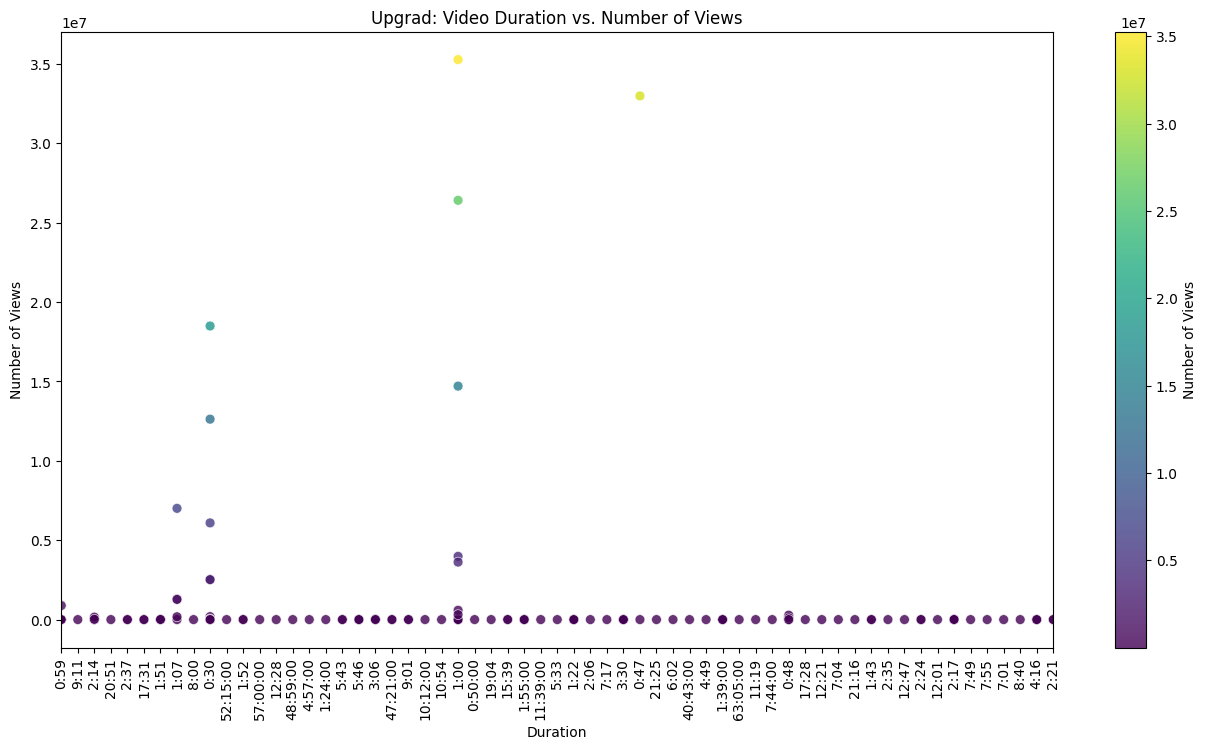

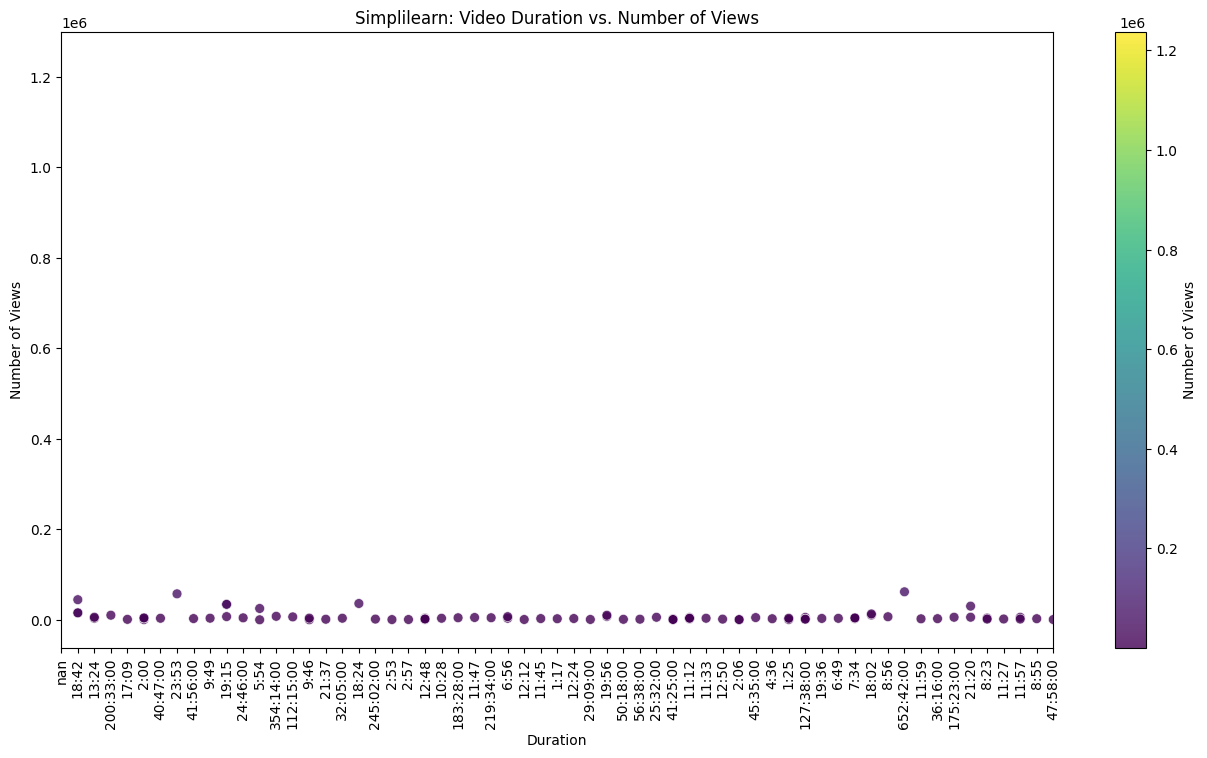

In [40]:
upgrad_data = pd.read_csv('upGrad-Duration-Views.csv')
simplilearn_data = pd.read_csv('Simplilearn-Duration-Views.csv')

# Function to convert duration to minutes
def convert_to_minutes(duration):
    if isinstance(duration, str):  # Check if duration is already a string
        if ':' in duration:  # Check if duration is in mm:ss or hh:mm:ss format
            parts = list(map(int, duration.split(':')))
            if len(parts) == 2:  # mm:ss format
                return parts[0] + parts[1] / 60
            elif len(parts) == 3:  # hh:mm:ss format
                return parts[0] * 60 + parts[1] + parts[2] / 60
    else:
        return float(duration)

# Convert duration column to string for both datasets
upgrad_data = upgrad_data.dropna(subset=['Duration'])
upgrad_data['Duration'] = upgrad_data['Duration'].astype(str)
simplilearn_data['Duration'] = simplilearn_data['Duration'].astype(str)

# Convert durations to minutes for both datasets
upgrad_data['Duration_min'] = upgrad_data['Duration'].apply(convert_to_minutes)
simplilearn_data['Duration_min'] = simplilearn_data['Duration'].apply(convert_to_minutes)

# Convert 'Views' column to numeric values
upgrad_data['Views'] = pd.to_numeric(upgrad_data['Views'].str.replace(',', ''), errors='coerce')
simplilearn_data['Views'] = pd.to_numeric(simplilearn_data['Views'].str.replace(',', ''), errors='coerce')

# Now, you can plot the scatter plot
plt.figure(figsize=(16, 8))
plt.scatter(upgrad_data['Duration'], upgrad_data['Views'], c=upgrad_data['Views'], cmap='viridis', alpha=0.8, s=50, edgecolors='w', linewidth=0.5)
plt.xlabel('Duration')
plt.ylabel('Number of Views')
plt.title('Upgrad: Video Duration vs. Number of Views')
plt.colorbar(label='Number of Views')
plt.xlim(0, 60)  # Adjust the range as needed
plt.xticks(rotation=90)
plt.show()

# # Plotting the scatter plot for Simplilearn views
plt.figure(figsize=(16, 8))
plt.scatter(simplilearn_data['Duration'], simplilearn_data['Views'], c=simplilearn_data['Views'], cmap='viridis', s=50, alpha=0.8, edgecolors='w', linewidth=0.5)
plt.xlabel('Duration')
plt.ylabel('Number of Views')
plt.title('Simplilearn: Video Duration vs. Number of Views')
plt.colorbar(label='Number of Views')
plt.xlim(0, 60)  # Adjust the range as needed
plt.xticks(rotation=90)
plt.show()


# Visualizing Number of Views Over Time

The following code cell reads data from CSV files containing information about video durations and views for both upGrad and Simplilearn YouTube channels. It converts the `Views` column to numeric values and buckets the number of views into categories. Then, it plots line graphs to visualize the number of views over time for both channels.

These line graphs depict the number of views over time for both upGrad and Simplilearn YouTube channels. The x-axis represents the sequential order of videos uploaded, while the y-axis represents the number of views. Each line represents a channel, with different colors distinguishing between upGrad and Simplilearn.

C:\Users\bhavj\AppData\Local\Temp\ipykernel_22436\2882632165.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  upgrad_views_by_category = upgrad_data.groupby('View Category').size()
C:\Users\bhavj\AppData\Local\Temp\ipykernel_22436\2882632165.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simplilearn_views_by_category = simplilearn_data.groupby('View Category').size()


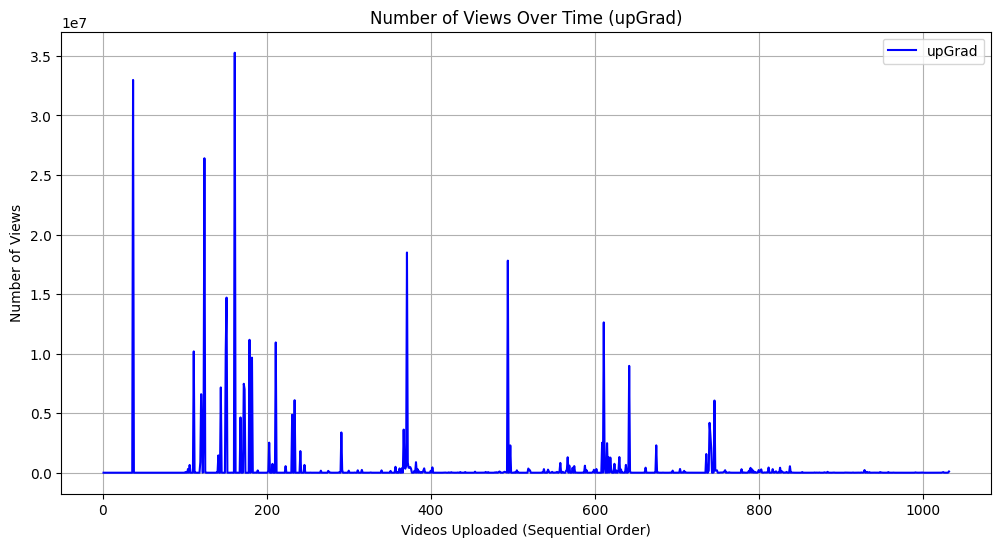

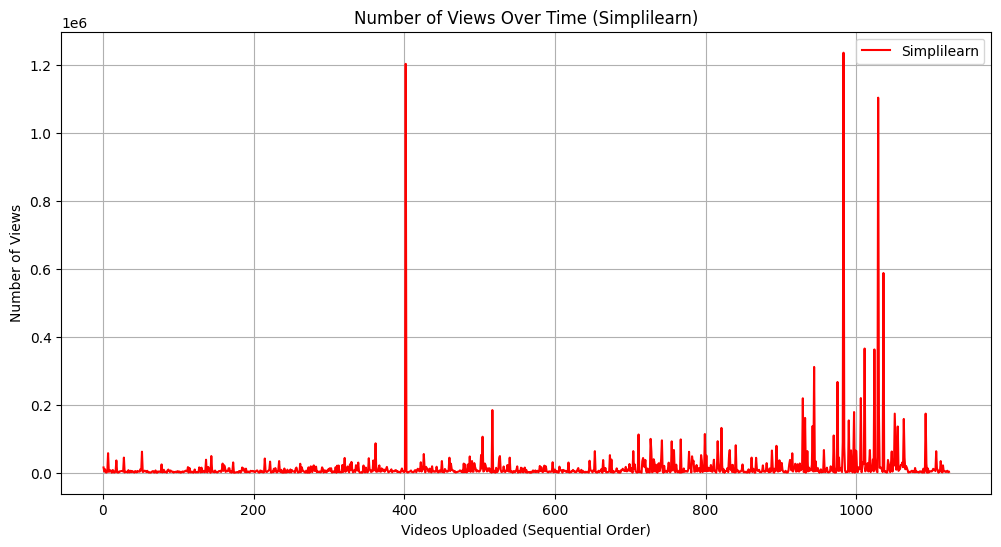

In [41]:
upgrad_data = pd.read_csv('upGrad-Duration-Views.csv')
simplilearn_data = pd.read_csv('Simplilearn-Duration-Views.csv')

# Convert 'Views' column to numeric values
upgrad_data['Views'] = upgrad_data['Views'].str.replace(',', '').astype(float)
simplilearn_data['Views'] = simplilearn_data['Views'].str.replace(',', '').astype(float)

view_bins = [0, 1000, 10000, 100000, 1000000, float('inf')]
view_labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M+']

# Bucket the number of views for both datasets
upgrad_data['View Category'] = pd.cut(upgrad_data['Views'], bins=view_bins, labels=view_labels)
simplilearn_data['View Category'] = pd.cut(simplilearn_data['Views'], bins=view_bins, labels=view_labels)

# Group by view category and count the number of videos in each category
upgrad_views_by_category = upgrad_data.groupby('View Category').size()
simplilearn_views_by_category = simplilearn_data.groupby('View Category').size()

# Plotting the line graph for Upgrad views over time
plt.figure(figsize=(12, 6))
plt.plot(upgrad_data.index, upgrad_data['Views'], label='upGrad', color='blue')
plt.xlabel('Videos Uploaded (Sequential Order)')
plt.ylabel('Number of Views')
plt.title('Number of Views Over Time (upGrad)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the line graph for Simplilearn views over time
plt.figure(figsize=(12, 6))
plt.plot(simplilearn_data.index, simplilearn_data['Views'], label='Simplilearn', color='red')
plt.xlabel('Videos Uploaded (Sequential Order)')
plt.ylabel('Number of Views')
plt.title('Number of Views Over Time (Simplilearn)')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of Video Tags - upGrad

This code cell reads the tags from a text file containing the tags of videos. It then extracts the tags of the first 100 and last 100 videos and counts the frequency of each tag in these subsets. Finally, it plots the most frequent tags from both subsets.

These plots visualize the most frequent tags found in the tags of the first 100 and last 100 videos, providing insights into the common themes or topics covered in these videos.

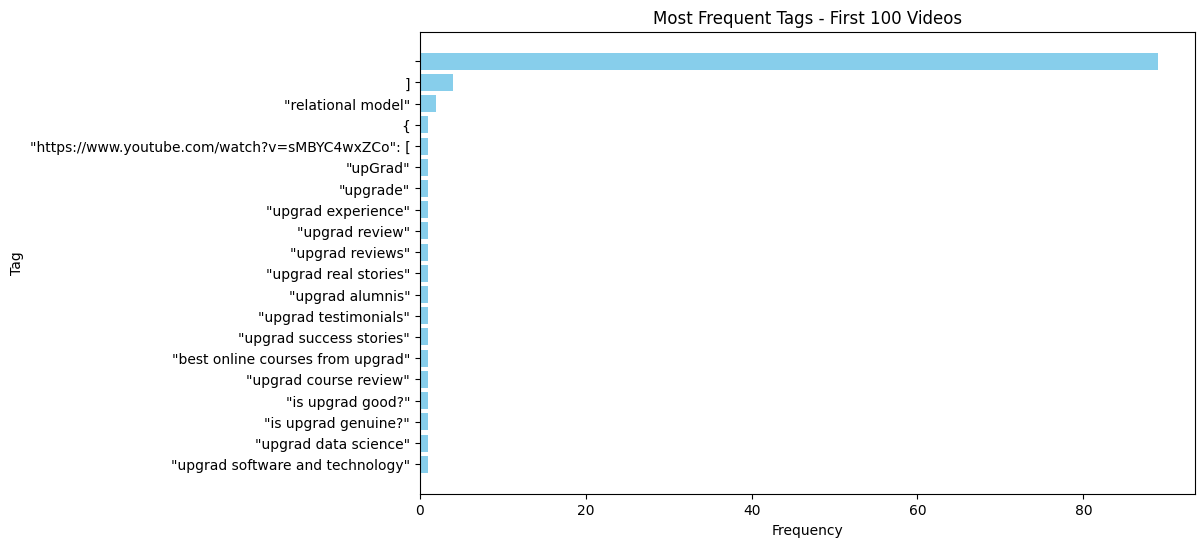

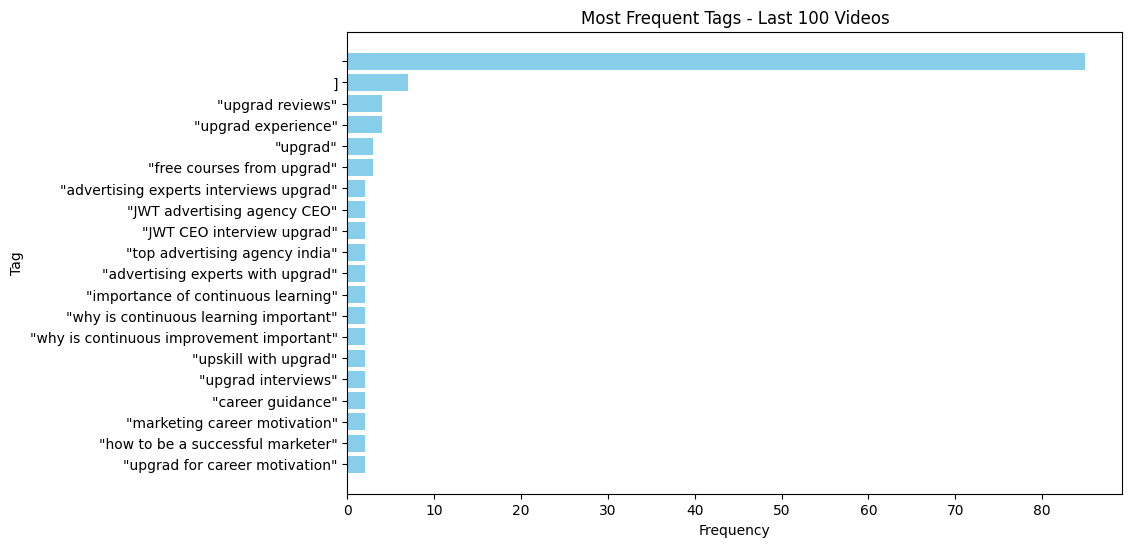

In [42]:
# Read the tags from the text file
with open('sample.txt', 'r') as file:
    all_tags = file.readlines()

# Clean up the tags (remove newline characters and split into individual tags)
all_tags = [tag.strip().split(',') for tag in all_tags]

# Extract the tags of the first 100 and last 100 videos
first_100_tags = [tag for tag_list in all_tags[:100] for tag in tag_list]
last_100_tags = [tag for tag_list in all_tags[-100:] for tag in tag_list]

# Filter out any non-tag elements (e.g., URLs)
first_100_tags = [tag for tag in first_100_tags if not tag.startswith('https://')]
last_100_tags = [tag for tag in last_100_tags if not tag.startswith('https://')]

# Count the frequency of each tag in the first 100 and last 100 tags
first_100_tag_counts = Counter(first_100_tags)
last_100_tag_counts = Counter(last_100_tags)

# Plot the most frequent tags from the first 100 videos
plt.figure(figsize=(10, 6))
first_100_most_common = first_100_tag_counts.most_common(20)
plt.barh([tag[0] for tag in first_100_most_common], [tag[1] for tag in first_100_most_common], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.title('Most Frequent Tags - First 100 Videos')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent tags on top
plt.show()

# Plot the most frequent tags from the last 100 videos
plt.figure(figsize=(10, 6))
last_100_most_common = last_100_tag_counts.most_common(20)
plt.barh([tag[0] for tag in last_100_most_common], [tag[1] for tag in last_100_most_common], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.title('Most Frequent Tags - Last 100 Videos')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent tags on top
plt.show()


# Analysis of Video Tags - Simplilearn

This code cell reads the tags from a text file containing the tags of videos. It then extracts the tags of the first 100 and last 100 videos and counts the frequency of each tag in these subsets. Finally, it plots the most frequent tags from both subsets.

These plots visualize the most frequent tags found in the tags of the first 100 and last 100 videos, providing insights into the common themes or topics covered in these videos.

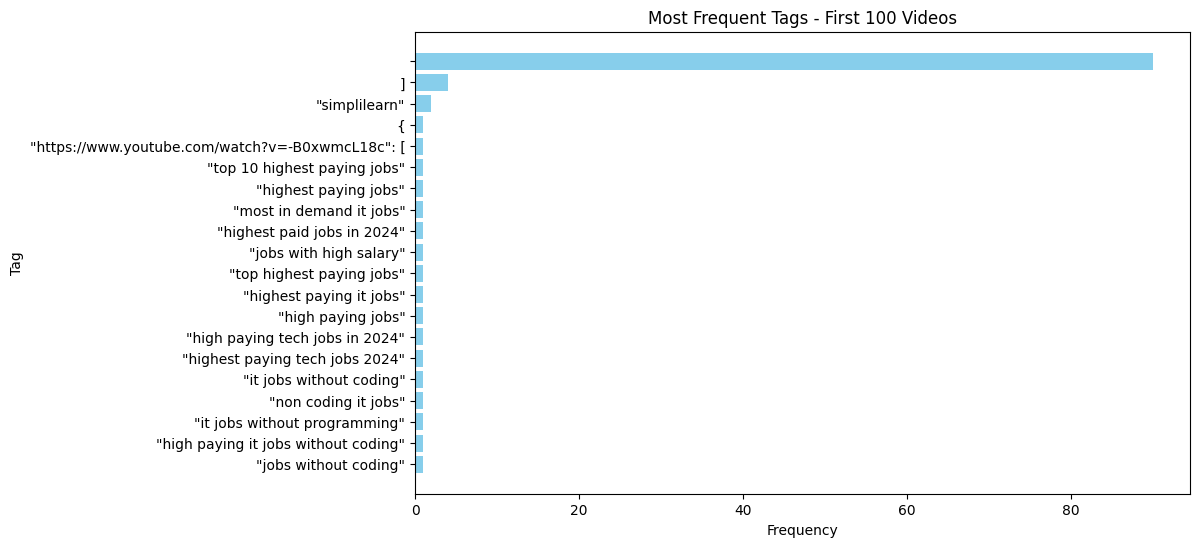

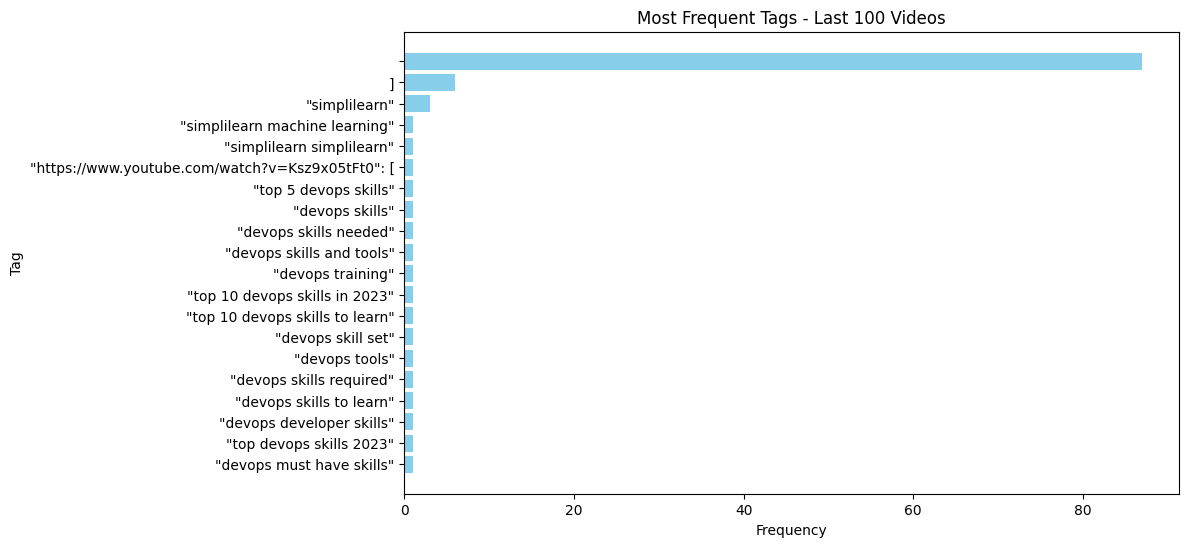

In [43]:
# Read the tags from the text file
with open('sample_simplilearn.txt', 'r') as file:
    all_tags = file.readlines()

# Clean up the tags (remove newline characters and split into individual tags)
all_tags = [tag.strip().split(',') for tag in all_tags]

# Extract the tags of the first 100 and last 100 videos
first_100_tags = [tag for tag_list in all_tags[:100] for tag in tag_list]
last_100_tags = [tag for tag_list in all_tags[-100:] for tag in tag_list]

# Filter out any non-tag elements (e.g., URLs)
first_100_tags = [tag for tag in first_100_tags if not tag.startswith('https://')]
last_100_tags = [tag for tag in last_100_tags if not tag.startswith('https://')]

# Count the frequency of each tag in the first 100 and last 100 tags
first_100_tag_counts = Counter(first_100_tags)
last_100_tag_counts = Counter(last_100_tags)

# Plot the most frequent tags from the first 100 videos
plt.figure(figsize=(10, 6))
first_100_most_common = first_100_tag_counts.most_common(20)
plt.barh([tag[0] for tag in first_100_most_common], [tag[1] for tag in first_100_most_common], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.title('Most Frequent Tags - First 100 Videos')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent tags on top
plt.show()

# Plot the most frequent tags from the last 100 videos
plt.figure(figsize=(10, 6))
last_100_most_common = last_100_tag_counts.most_common(20)
plt.barh([tag[0] for tag in last_100_most_common], [tag[1] for tag in last_100_most_common], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.title('Most Frequent Tags - Last 100 Videos')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent tags on top
plt.show()
